## This notebook creates the ordination plots in Figures 2 and Supplemental Figure S5.

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(RColorBrewer)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


In [2]:
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/ps.merged")
# Read in the phyloseq object created in Making_ps_object.pub

In [3]:
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
ps.hell = transform_sample_counts(ps, function(x) (x / sum(x))^0.5)
# Hellinger Transformation: "Particularly suited to species abundance data, 
    # this transformation gives low weights to variables with low counts and many zeros. 
    # The transformation itself comprises dividing each value in a data matrix by its row sum, 
    # and taking the square root of the quotient.

In [4]:
ps.plot = ps.hell
# Setting the plot to Hellinger-transformed data

In [5]:
dist = distance(ps.plot,method="bray")
ord = metaMDS(dist,k=2,trymax=1000)
# Ordinating the data with Bray-Curtis dissimilarities and NMDS

Run 0 stress 0.1578674 
Run 1 stress 0.1842797 
Run 2 stress 0.1578832 
... Procrustes: rmse 0.002100527  max resid 0.01736862 
Run 3 stress 0.1873114 
Run 4 stress 0.1966673 
Run 5 stress 0.1578444 
... New best solution
... Procrustes: rmse 0.001397511  max resid 0.01142283 
Run 6 stress 0.1578832 
... Procrustes: rmse 0.003273734  max resid 0.02876852 
Run 7 stress 0.1578442 
... New best solution
... Procrustes: rmse 0.0001015619  max resid 0.0006777507 
... Similar to previous best
Run 8 stress 0.1578832 
... Procrustes: rmse 0.003211413  max resid 0.02813431 
Run 9 stress 0.1578812 
... Procrustes: rmse 0.003521137  max resid 0.02826754 
Run 10 stress 0.1578808 
... Procrustes: rmse 0.003524642  max resid 0.0282871 
Run 11 stress 0.1578458 
... Procrustes: rmse 0.001400693  max resid 0.01015454 
Run 12 stress 0.1578453 
... Procrustes: rmse 0.001399822  max resid 0.01020801 
Run 13 stress 0.1578454 
... Procrustes: rmse 0.001395978  max resid 0.01018736 
Run 14 stress 0.1578813 


In [7]:
ord.plot = data.frame(ord$points)
# Extracting the coordinates from the ordination
ord.plot = merge(ord.plot,sample_data(ps.plot), by = 0)
# Adding the sample data to the ordination co-ordinates

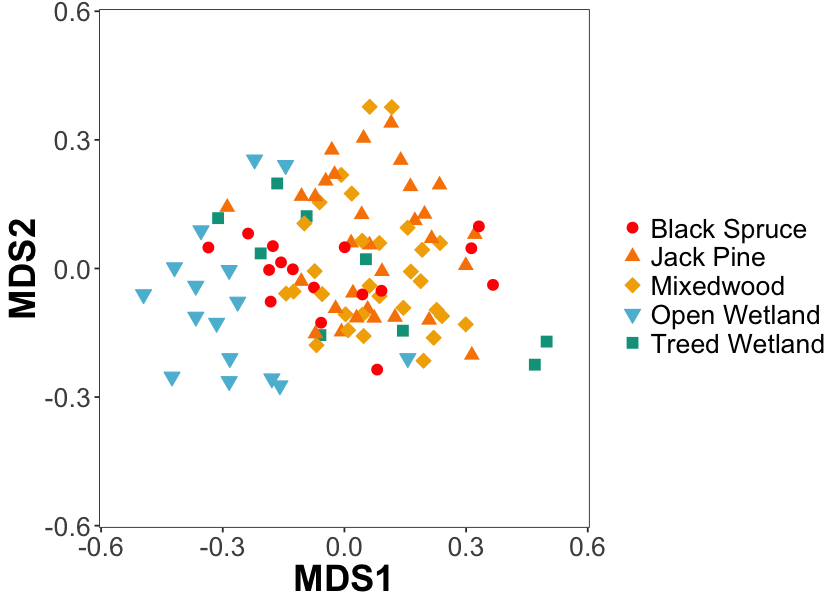

In [8]:
# Creating Supplemental Figure S5
options(repr.plot.width=7, repr.plot.height=5)

p = ggplot(ord.plot,aes(x=MDS1, y=MDS2, color = Veg_Comm, shape = Veg_Comm, fill=Veg_Comm))

p = p  + geom_point(size=3)
p = p + scale_color_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_fill_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_shape_manual(values=c(16,17,23,25,15))

p = p + guides(color=guide_legend(title=""),fill=guide_legend(title=""),shape=guide_legend(title=""))

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))
p = p + ylim(-0.55,0.55)+xlim(-0.55,0.55)

p

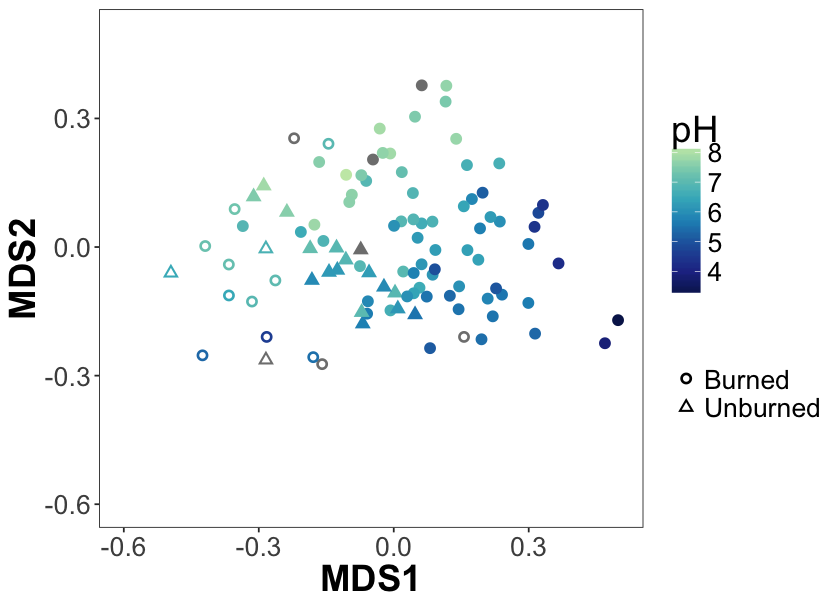

In [9]:
## Creating Figure 2
options(repr.plot.width=7, repr.plot.height=5)


p = ggplot(ord.plot,aes(x=MDS1, y=MDS2, color = pH, shape = Burned_Unburned))

p = p  + geom_point(size=3)
palette = brewer.pal(9, "YlGnBu")[3:9]
p = p + scale_colour_gradientn(colours=rev(palette))


p = p + guides(color=guide_colorbar(title="pH"),shape=guide_legend(title=""))
#p = p + facet_wrap(~Land_Class)

wetlands = ord.plot%>%
    filter(Veg_Comm=="Open Wetland")
p = p + geom_point(data=wetlands, aes(x=MDS1,y=MDS2), color="white", size=1.5)

p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))
p = p + ylim(-0.6,0.5)+xlim(-0.6,0.5)
p